In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
import os

In [4]:
shard0_pn_1=pd.read_csv("test_shard=0pn=1.csv")
shard1_pn_1=pd.read_csv("test_shard=1pn=1.csv")
shard0_pn_10=pd.read_csv("test_shard=0pn=10.csv")
shard1_pn_10=pd.read_csv("test_shard=1pn=10.csv")
shard0_pn_100=pd.read_csv("test_shard=0pn=100.csv")
shard1_pn_100=pd.read_csv("test_shard=1pn=100.csv")
shard0_pn_1000=pd.read_csv("test_shard=0pn=1000.csv")
shard1_pn_1000=pd.read_csv("test_shard=1pn=1000.csv")
shard0_pn_10000=pd.read_csv("test_shard=0pn=10000.csv")
shard1_pn_10000=pd.read_csv("test_shard=1pn=10000.csv")

Beta = (pd.read_csv(
"synth_data/Xy_N=10000_Epoch_N=10000_Nt=100_p=2/"+
    "GP_version=0/Beta_t_Xy_N=10000_Epoch_N=10000_Nt=100_p=2_GP_version=0.csv")[["B_0","B_1"]]
        )

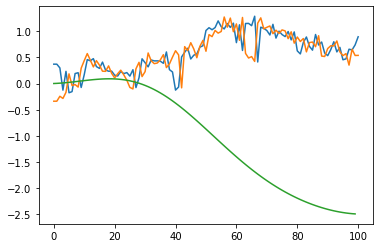

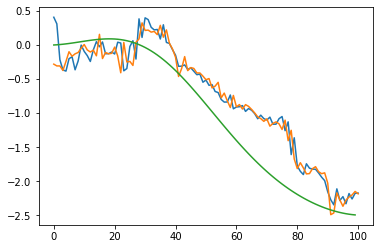

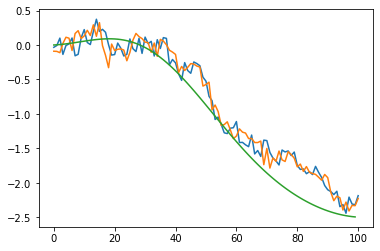

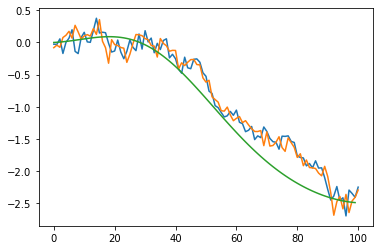

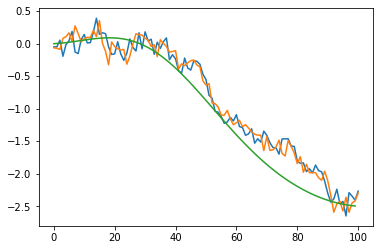

In [6]:
_=plt.plot(shard0_pn_1.loc[:,["0"]])
_=plt.plot(shard1_pn_1.loc[:,["0"]])
_=plt.plot(Beta.loc[:,["B_0"]])
plt.show()
_=plt.plot(shard0_pn_10.loc[:,["0"]])
_=plt.plot(shard1_pn_10.loc[:,["0"]])
_=plt.plot(Beta.loc[:,["B_0"]])
plt.show()
_=plt.plot(shard0_pn_100.loc[:,["0"]])
_=plt.plot(shard1_pn_100.loc[:,["0"]])
_=plt.plot(Beta.loc[:,["B_0"]])
plt.show()
_=plt.plot(shard0_pn_1000.loc[:,["0"]])
_=plt.plot(shard1_pn_1000.loc[:,["0"]])
_=plt.plot(Beta.loc[:,["B_0"]])
plt.show()
_=plt.plot(shard0_pn_10000.loc[:,["0"]])
_=plt.plot(shard1_pn_10000.loc[:,["0"]])
_=plt.plot(Beta.loc[:,["B_0"]])
plt.show()


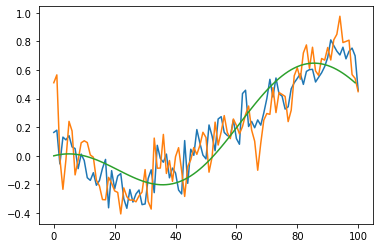

In [19]:
_=plt.plot(shard0.loc[:,["1"]])
_=plt.plot(shard1.loc[:,["1"]])

_=plt.plot(Beta.loc[:,["B_1"]])

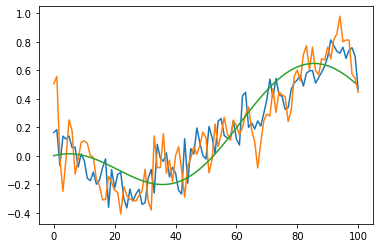

In [3]:
_=plt.plot(shard0.loc[:,["1"]])
_=plt.plot(shard1.loc[:,["1"]])

_=plt.plot(Beta.loc[:,["B_1"]])